In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as npb

In [2]:
df = pd.read_csv('../input/train.csv')
df.columns = [col.lower() for col in df]
df[['deck','room','side']] = df.pop('cabin').str.split('/', expand=True)
df.head()

,passengerid,homeplanet,cryosleep,destination,age,vip,roomservice,foodcourt,shoppingmall,spa,vrdeck,name,transported,deck,room,side
0,0001_01,Europa,False,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,B,0,P
1,0002_01,Earth,False,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,F,0,S
2,0003_01,Europa,False,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,A,0,S
3,0003_02,Europa,False,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,A,0,S
4,0004_01,Earth,False,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,F,1,S


In [3]:
spending_cols = ['roomservice', 'foodcourt', 'shoppingmall', 'spa', 'vrdeck']

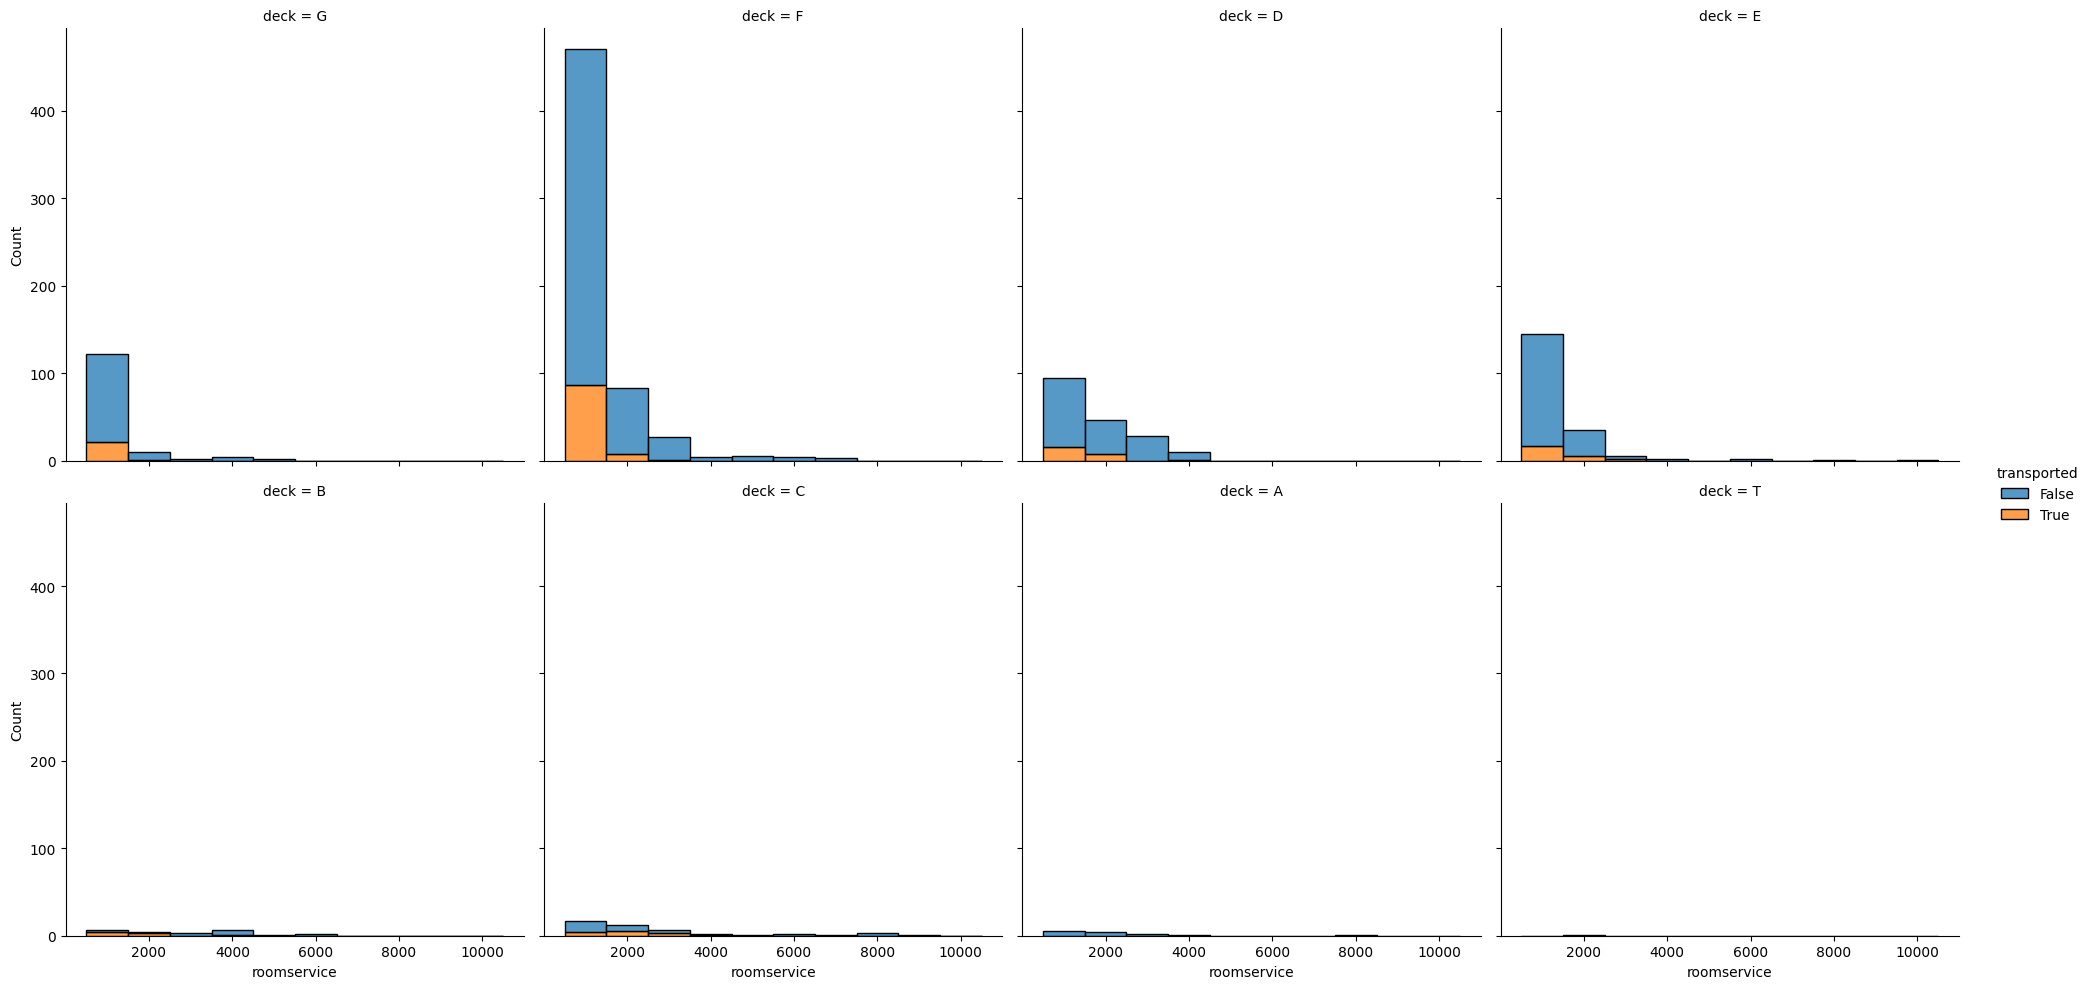

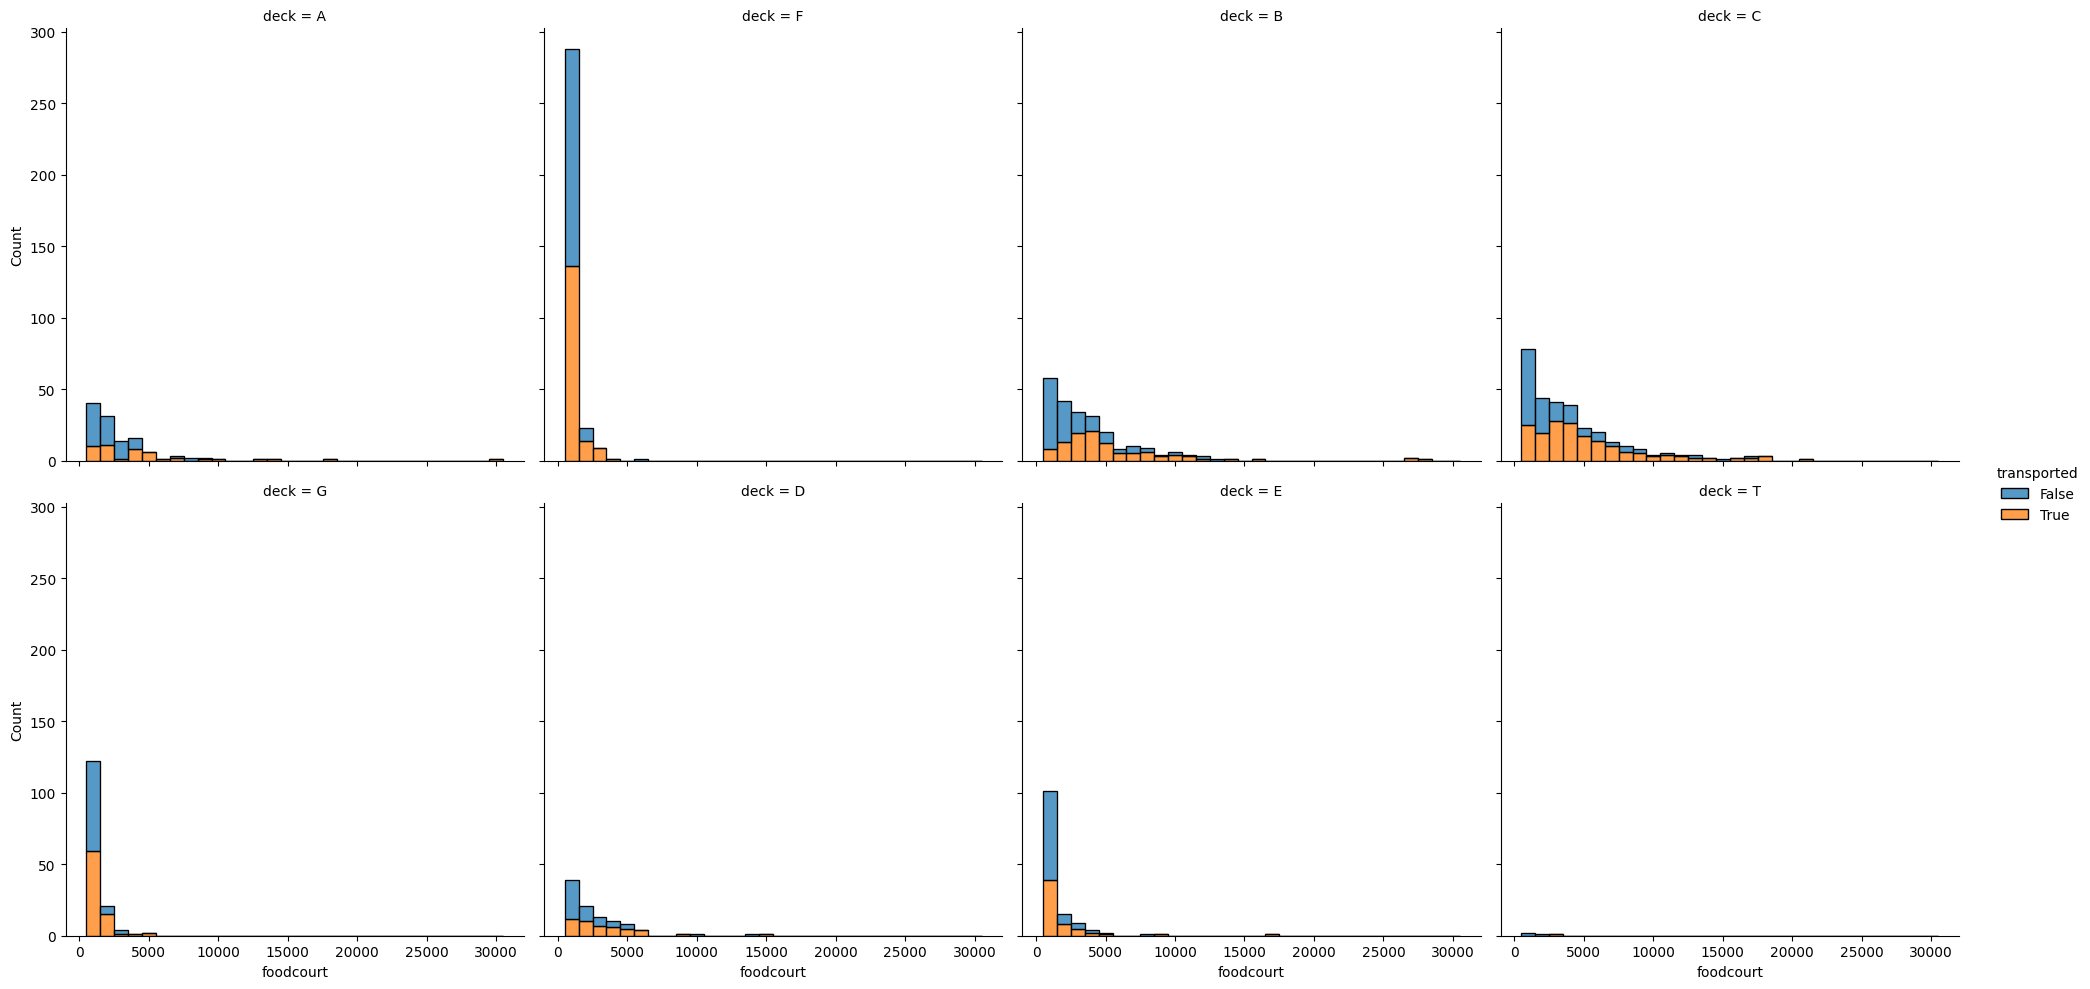

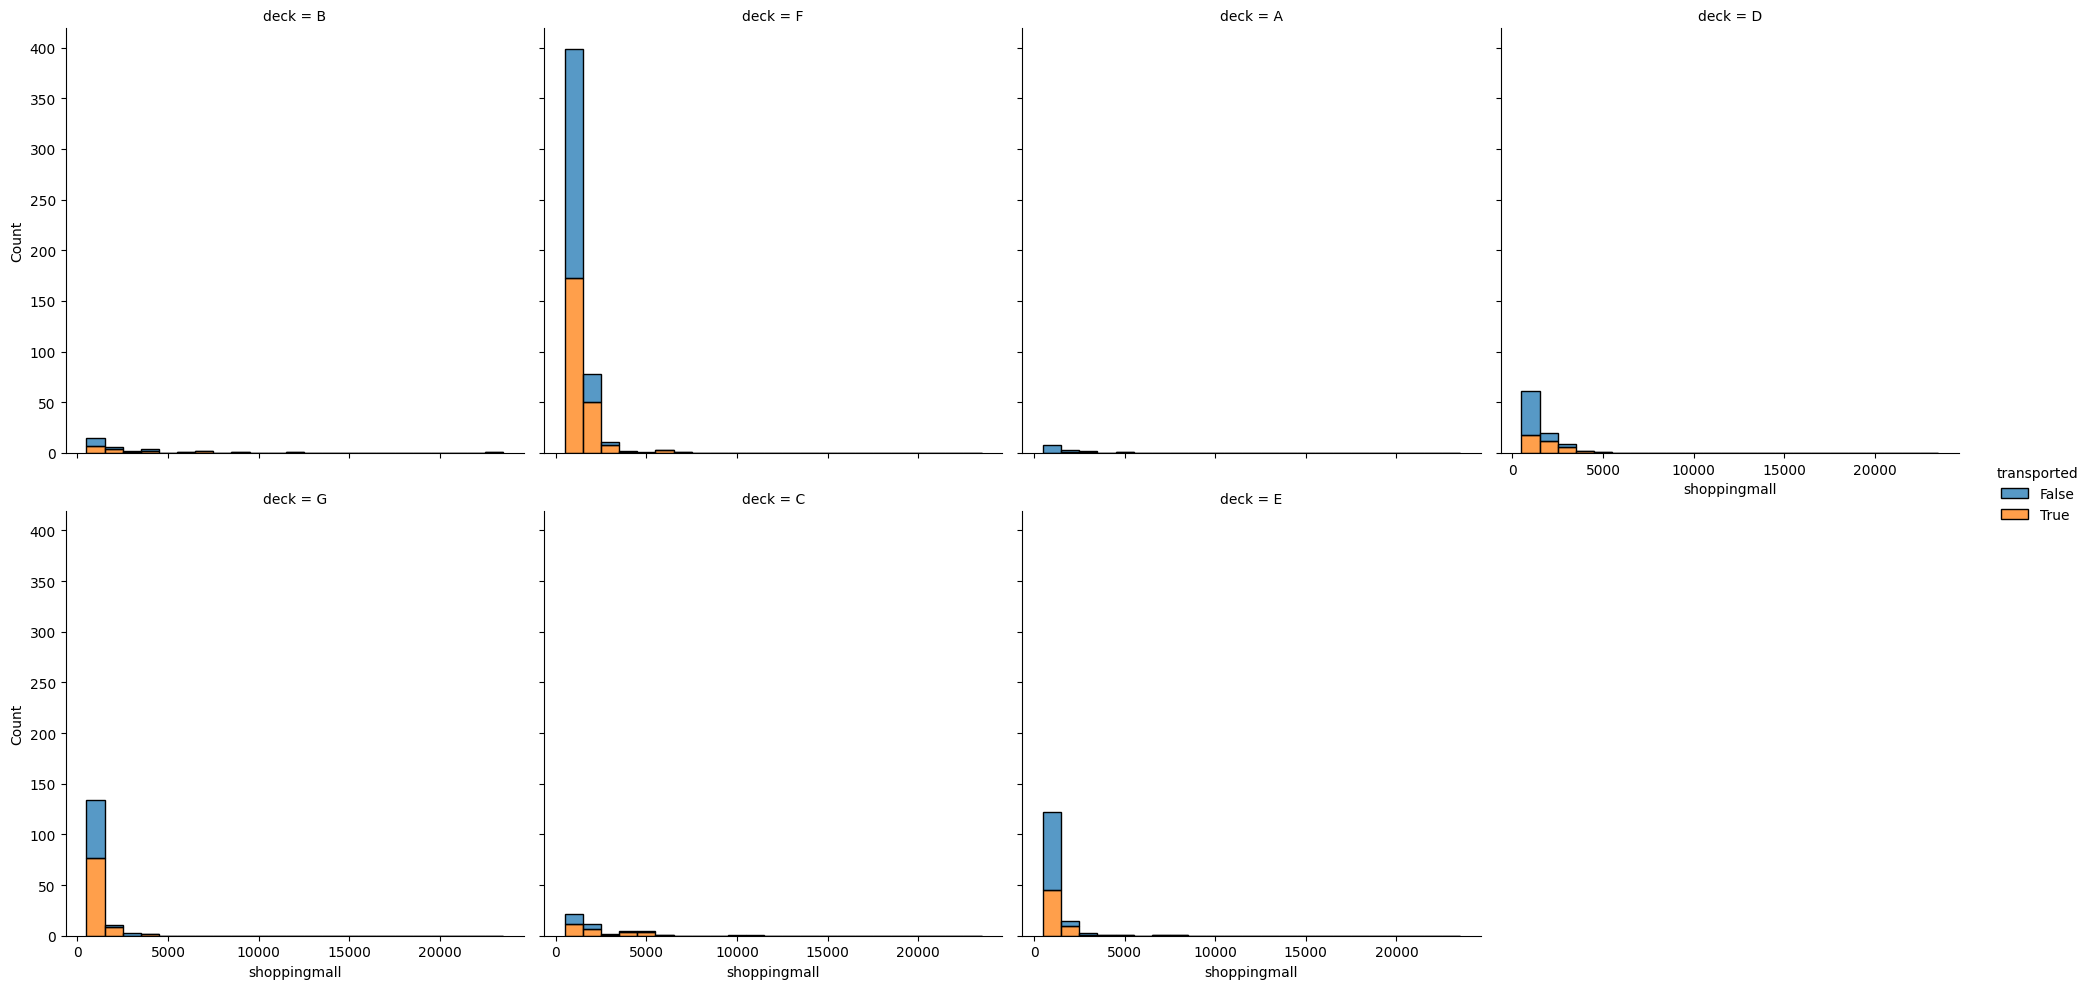

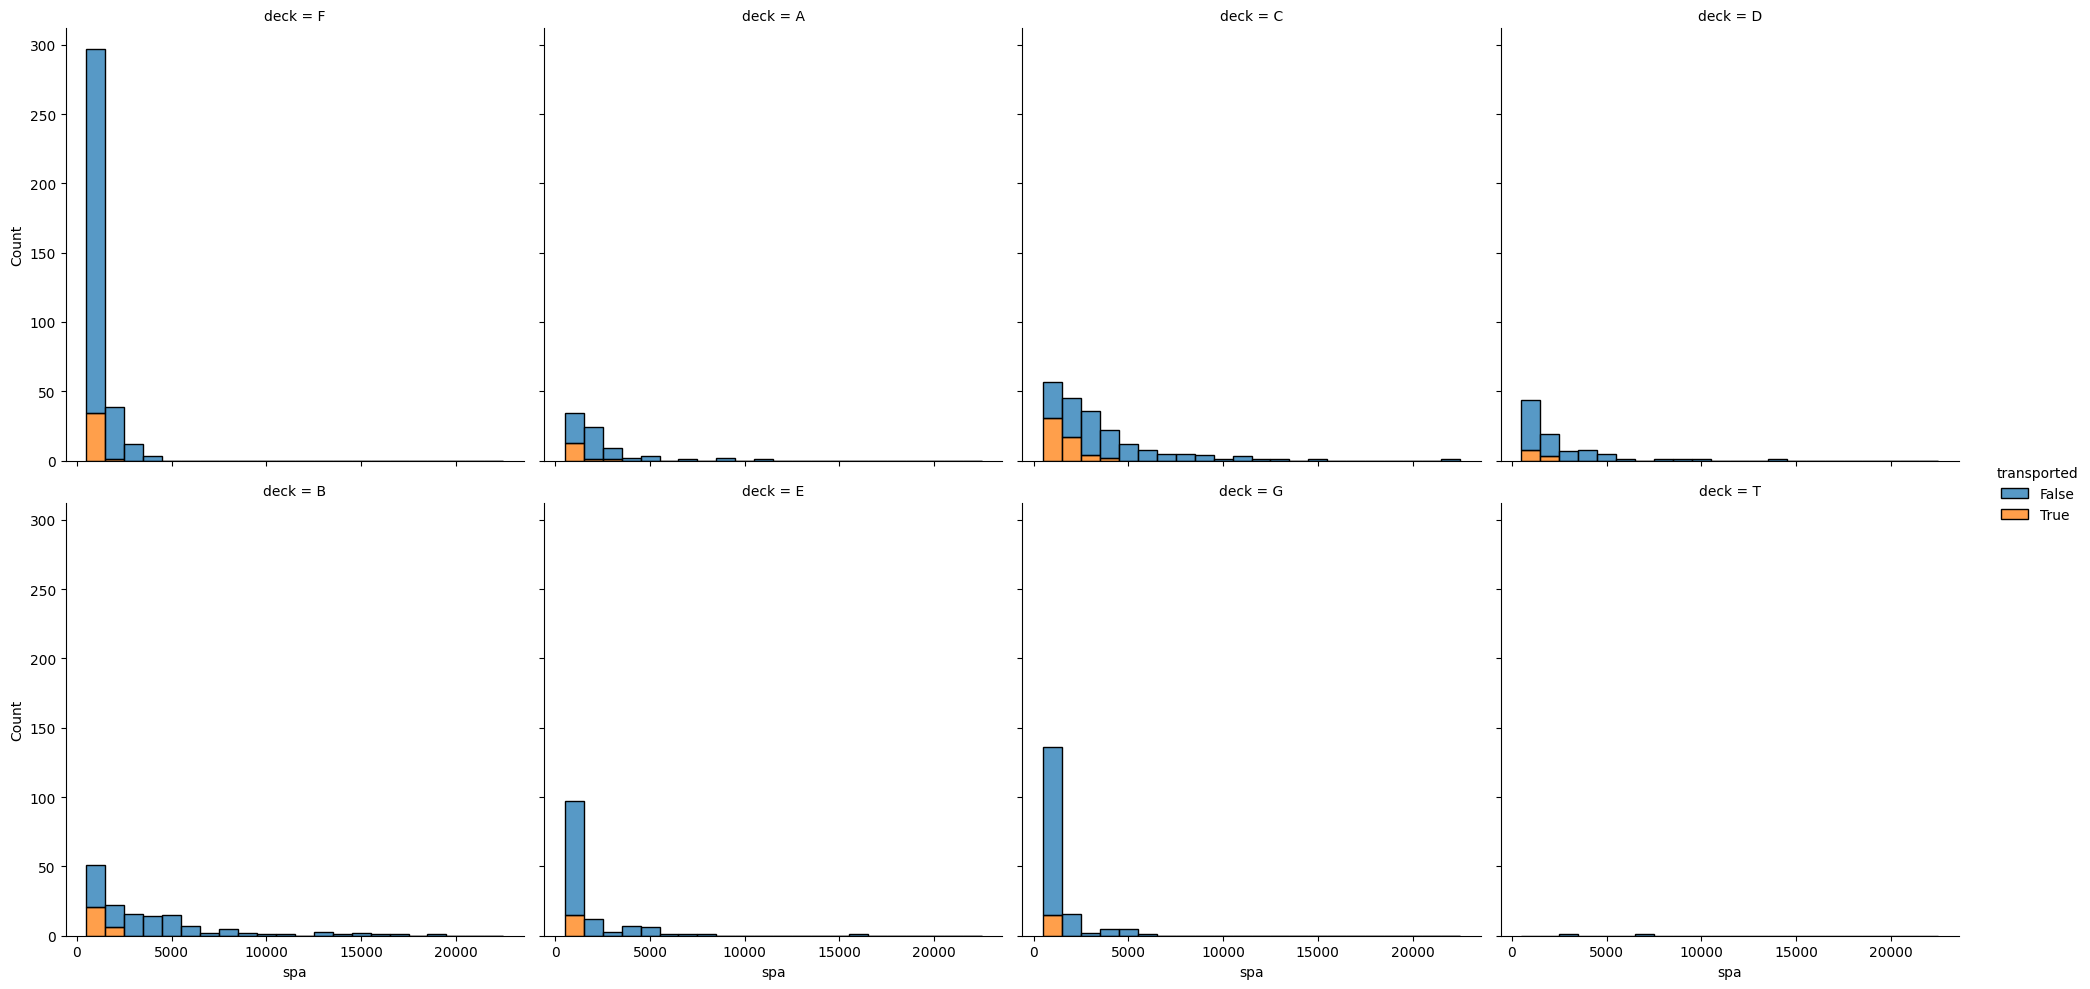

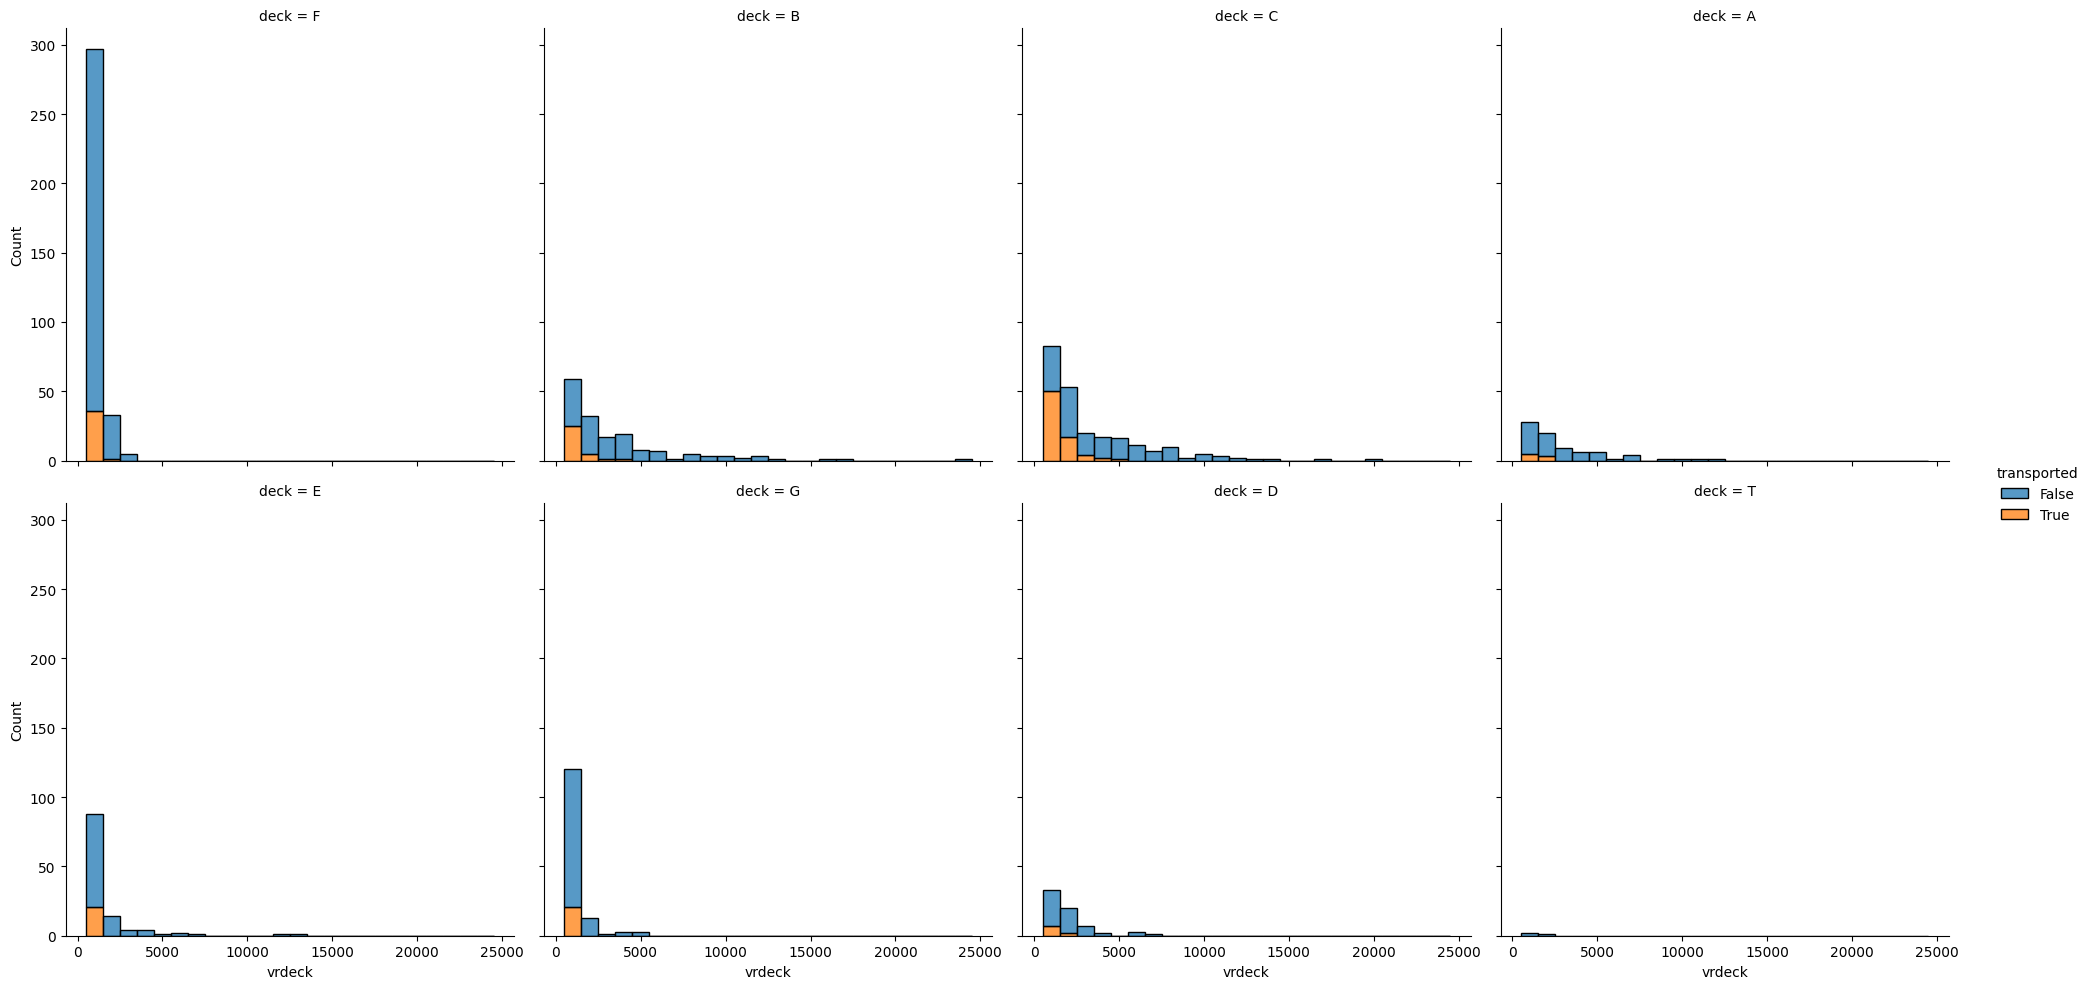

In [9]:
for col in spending_cols:
    sns.displot(data=df[df[col] > 500], x=col, hue='transported', multiple="stack", binwidth=1000, col='deck', col_wrap=4)
    plt.show()

It looks like people who spent their time spending money in the shopping mall or food court were more at risk of transportation than any other category.

In [19]:
df['favorite_passtime'] = df[spending_cols].idxmax(axis=1)

In [25]:
df.head()

,passengerid,homeplanet,cryosleep,destination,age,vip,roomservice,foodcourt,shoppingmall,spa,vrdeck,name,transported,deck,room,side,favorite_passtime
0,0001_01,Europa,False,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,B,0,P,roomservice
1,0002_01,Earth,False,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,F,0,S,spa
2,0003_01,Europa,False,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,A,0,S,spa
3,0003_02,Europa,False,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,A,0,S,spa
4,0004_01,Earth,False,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,F,1,S,spa


<AxesSubplot: xlabel='favorite_passtime', ylabel='Count'>

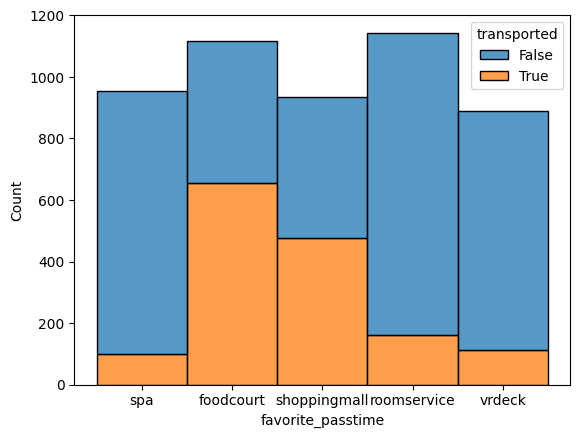

In [26]:
sns.histplot(data=df[df[spending_cols].sum(axis=1) > 0], x='favorite_passtime', hue='transported', multiple='stack')

<AxesSubplot: xlabel='deck', ylabel='Count'>

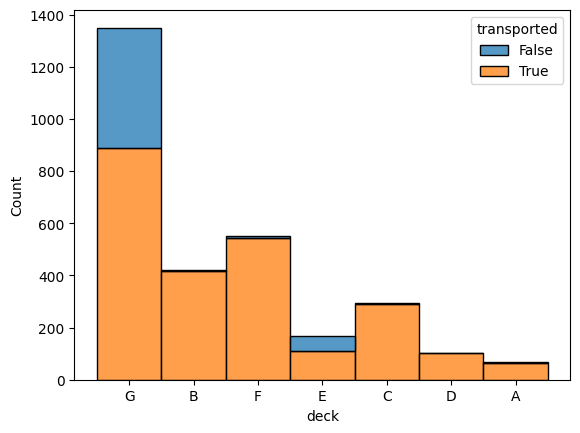

In [29]:
sns.histplot(data= df[df['cryosleep'] == True], x='deck', hue='transported', multiple='stack')